In [1]:
!nvidia-smi

Thu Jan  5 00:41:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [2]:
!pip3 install openmim
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 7.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 6.2 MB/s eta 0:00:00


### Step 2. Install MMDetection from the source.

In [3]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 33298, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 33298 (delta 27), reused 61 (delta 12), pack-reused 33183
Receiving objects: 100% (33298/33298), 45.21 MiB | 15.10 MiB/s, done.
Resolving deltas: 100% (23513/23513), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


### Step 3. Verification

In [4]:
import mmdet
print(mmdet.__version__)
# Example output: 2.26.0

2.27.0


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [5]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 28.8 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [6]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


[array([[5.12588043e+01, 1.13287674e+02, 6.75582886e+01, 1.32954651e+02,
         5.93155436e-02],
        [5.45404846e+02, 1.11175247e+02, 5.58186951e+02, 1.24366737e+02,
         5.03070503e-02],
        [3.66082550e+02, 1.23854057e+02, 3.81954681e+02, 1.45346939e+02,
         4.83217202e-02],
        [4.92554970e+01, 1.18862099e+02, 6.38435555e+01, 1.42556519e+02,
         4.66163717e-02],
        [5.28772766e+02, 1.10966644e+02, 5.40577209e+02, 1.23876968e+02,
         3.13960202e-02],
        [4.50718292e+02, 1.01557198e+02, 4.62131439e+02, 1.10339989e+02,
         2.94490140e-02],
        [2.09123947e+02, 9.55709229e+01, 2.23539291e+02, 1.06074478e+02,
         2.49082837e-02],
        [3.54278015e+02, 1.14047302e+02, 3.68170349e+02, 1.26227058e+02,
         2.37890147e-02],
        [2.86970093e+02, 1.19910110e+02, 3.04447571e+02, 1.50397400e+02,
         1.87797677e-02],
        [2.17763092e+02, 1.62588028e+02, 4.57619904e+02, 3.39809723e+02,
         1.80731844e-02],
        [1

# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

### BCCD Dataset 다운로드
* [BCCD Dataset](https://github.com/Shenggan/BCCD_Dataset.git) 
* BCCD Dataset은 백혈구(WBC), 적혈구(RBC), 혈소판(Platelets) 세가지 유형의 Object Class를 가짐.
* 다운로드 받은 Dataset은 Pascal VOC 형태이므로 이를 별도의 유틸리티를 이용하여 MS-COCO 형태로 변환 

In [7]:
# download the data
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 39.60 MiB/s, done.
Resolving deltas: 100% (378/378), done.


### BCCD Dataset의 디렉토리 구조 보기

In [ ]:
# Check the directory structure of the Oxford Pet

# Install tree first
!apt-get -q install tree

In [ ]:
!tree ./BCCD_Dataset/BCCD

### 이미지와 레이블 보기

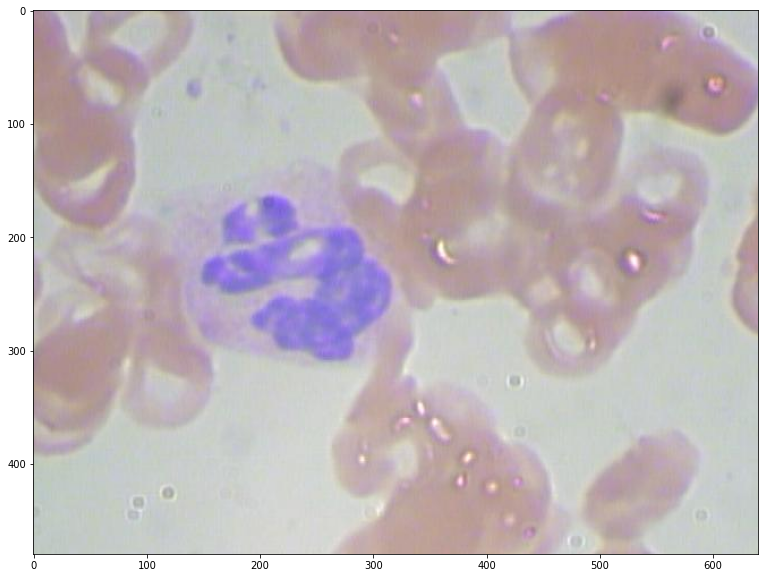

In [17]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./BCCD_Dataset/BCCD/JPEGImages/BloodImage_00004.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [18]:
# Check the label of a single image
!cat ./BCCD_Dataset/BCCD/Annotations/BloodImage_00004.xml

<annotation>
	<folder>JPEGImages</folder>
	<filename>BloodImage_00004.jpg</filename>
	<path>/home/pi/detection_dataset/JPEGImages/BloodImage_00004.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>480</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>WBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>109</xmin>
			<ymin>134</ymin>
			<xmax>324</xmax>
			<ymax>321</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>432</xmin>
			<ymin>242</ymin>
			<xmax>528</xmax>
			<ymax>325</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>510</xmin>
			<ymin>112</ymin>
			<xmax>606</xmax>
			<ymax>195</ymax>
		</bndbox>
	</object>
	<object>
		

[{'class_name': 'WBC', 'bndbox_coor': (109, 134, 324, 321)}, {'class_name': 'RBC', 'bndbox_coor': (432, 242, 528, 325)}, {'class_name': 'RBC', 'bndbox_coor': (510, 112, 606, 195)}, {'class_name': 'RBC', 'bndbox_coor': (482, 361, 594, 475)}, {'class_name': 'RBC', 'bndbox_coor': (75, 281, 166, 375)}, {'class_name': 'RBC', 'bndbox_coor': (38, 1, 147, 62)}, {'class_name': 'RBC', 'bndbox_coor': (288, 33, 390, 131)}, {'class_name': 'RBC', 'bndbox_coor': (411, 66, 527, 185)}, {'class_name': 'RBC', 'bndbox_coor': (1, 82, 102, 198)}, {'class_name': 'RBC', 'bndbox_coor': (1, 283, 81, 372)}, {'class_name': 'RBC', 'bndbox_coor': (1, 315, 78, 397)}, {'class_name': 'RBC', 'bndbox_coor': (391, 373, 469, 455)}, {'class_name': 'Platelets', 'bndbox_coor': (127, 47, 163, 81)}]


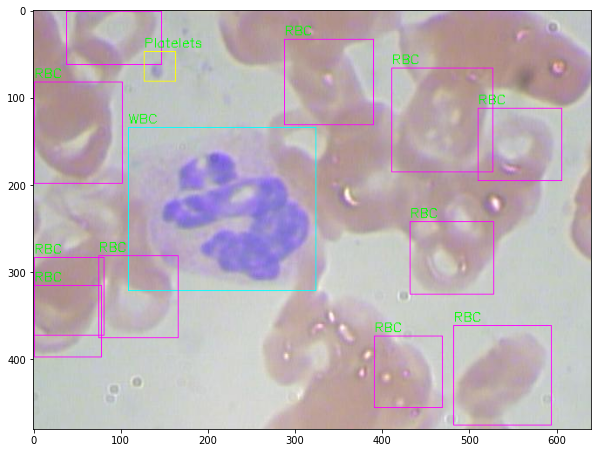

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = "./BCCD_Dataset/BCCD/JPEGImages"
xml_file = "./BCCD_Dataset/BCCD/Annotations/BloodImage_00004.xml"

class2color = {'WBC':(255, 255, 0), 'RBC':(255, 0, 255), 'Platelets':(0, 255, 255)}

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### MS-COCO 포맷으로 변환하기
- voc 포맷을 coco 포맷으로 변환하는 패키지
- https://github.com/yukkyo/voc2coco How to use 참고

In [19]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 6.18 MiB/s, done.
Resolving deltas: 100% (387/387), done.


1. Make labels.txt

In [20]:
with open('./BCCD_Dataset/BCCD/labels.txt', 'w') as f:
  f.write('WBC\n')
  f.write('RBC\n')
  f.write('Platelets\n')

In [21]:
!cat ./BCCD_Dataset/BCCD/labels.txt

WBC
RBC
Platelets


2. Run Script

In [22]:
%pwd

'/content/mmdetection'

In [23]:
%cd voc2coco

/content/mmdetection/voc2coco


In [24]:
!python voc2coco.py \
    --ann_dir ../BCCD_Dataset/BCCD/Annotations \
    --ann_ids ../BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
    --labels ../BCCD_Dataset/BCCD/labels.txt \
    --output ../BCCD_Dataset/BCCD/train.json \
    --ext xml

Start converting !
100% 205/205 [00:00<00:00, 5293.85it/s]


In [25]:
!cat ../BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 